In [18]:
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:

def read_medical_image(image_path):
    try:
        image = Image.open(image_path)
        image_array = np.array(image)
        return image_array
    except Exception as e:
        return None

In [3]:

def logistic_map(mu, x):
    return mu * x * (1 - x)

In [4]:

def generate_random_key(initial_condition, control_parameter, size):
    key = []
    x = initial_condition
    for _ in range(size):
        x = logistic_map(control_parameter, x)
        key.append(x)
    return key

In [5]:
#Reverse Confuse the pixels

def reverse_confuse_pixels(confused_image, random_key):
    # Flatten the confused image
    flattened_image = confused_image.flatten()
    reversed_image = np.zeros_like(flattened_image)
    pixel_order = np.argsort(random_key)
    reversed_image[pixel_order] = flattened_image
    height, width = confused_image.shape
    return reversed_image.reshape(height, width)


In [6]:
# Reverse Diffuse the pixels 

def reverse_diffuse_pixels(diffused_image, random_key):
    bit=2**32
    flattened_image = diffused_image.flatten()
    reversed_image = np.zeros_like(flattened_image)    
    for i, pixel in enumerate(flattened_image):
        reversed_image[i] = (pixel - int(random_key[i] * bit)) % 256
    height, width = diffused_image.shape
    return reversed_image.reshape(height, width)


In [7]:
# Main function of decryption

def decrypt_image(image_path, initial_condition, control_parameter):
    # Step 1: Read the image
    image_array = read_medical_image(image_path)
    if image_array is None:
        return None

    # Step 2: Generate the random key
    random_key = generate_random_key(initial_condition, control_parameter, image_array.size)
    #print(random_key[0:5])

    # Step 3: Confuse pixel positions
    reversed_diffusion_image = reverse_diffuse_pixels(image_array, random_key)
    print()

    # Step 4: Diffuse pixel values
    original_image = reverse_confuse_pixels(reversed_diffusion_image, random_key)
    #print(original_image)

    return original_image

In [11]:

image_path = "Encrypted_image.jpg"  #encrypted image path
initial_condition = 0.4
control_parameter = 3.87
decrypted_image = decrypt_image(image_path, initial_condition, control_parameter)


In [12]:
if decrypted_image is not None:

    decrypted_image = Image.fromarray(decrypted_image)
    decrypted_image.save("Decrypted_image.jpg")
    print("Image decryption complete.")
else:
    print("Failed to decrypt the image.")

Image decryption complete.


In [13]:
decrypted_image = Image.open("Decrypted_image.jpg")
decrypted_image.show()

In [14]:
original_image = "images/lungs.jpg"

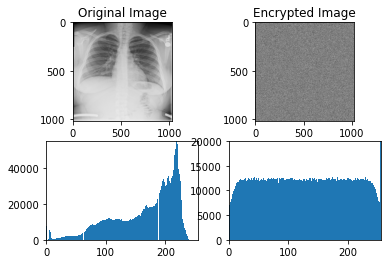

In [19]:
image = cv2.imread(original_image)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")

encry_img = cv2.imread(image_path)
ency_rgb = cv2.cvtColor(encry_img, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 2)
plt.imshow(ency_rgb)
plt.title("Encrypted Image")


plt.subplot(2, 2, 3)
plt.hist(image.ravel(), bins=256)
plt.xlim(0, 255)  
plt.ylim(0, 55000)

plt.subplot(2, 2, 4)
plt.hist(encry_img.ravel(), bins=256)
plt.xlim(0, 255)  
plt.ylim(0, 20000)

plt.show()